In [3]:
import numpy as np
import os,sys,glob
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [4]:
imaging_path = '/Volumes/DATA6/targeting/data/jgcamp8/jgcamp8_2022_8_31-10_37_15'

In [5]:
df_camera_triggers = pd.read_csv(os.path.join(imaging_path,'TUcam_triggers.csv'),index_col=None,header=None)
df_grating_frames  = pd.read_csv(os.path.join(imaging_path,'grating_frames.csv'),index_col=None,header=None)
df_gratings        = pd.read_csv(os.path.join(imaging_path,'gratings.csv'),index_col=None)

### check the stimulus data

In [6]:
df_gratings

,,Frame,Timestamp,Value
1,0.033345,(8/31/2022 10:37:16 AM -06:00,1,3.14)
1167,19.841368,(8/31/2022 10:37:36 AM -06:00,1,-3.14)
2366,39.866567,(8/31/2022 10:37:56 AM -06:00,1,3.14)
3563,59.883345,(8/31/2022 10:38:16 AM -06:00,1,-1.57)
4762,79.902678,(8/31/2022 10:38:36 AM -06:00,1,-1.57)
5961,99.932996,(8/31/2022 10:38:56 AM -06:00,1,-1.57)
7160,119.950883,(8/31/2022 10:39:16 AM -06:00,1,-3.14)
8359,139.976580,(8/31/2022 10:39:36 AM -06:00,1,1.57)
9557,159.997909,(8/31/2022 10:39:56 AM -06:00,1,-1.57)
10755,180.000065,(8/31/2022 10:40:16 AM -06:00,1,3.14)


In [7]:
df_camera_triggers

,0,1,2,3,4
0,(10,37,18,223,637975390382233728)
1,(10,37,18,348,637975390383480064)
2,(10,37,18,474,637975390384747008)
3,(10,37,18,599,637975390385994880)
4,(10,37,18,726,637975390387260800)
...,...,...,...,...,...
3928,(10,53,46,667,637975400266679040)
3929,(10,53,46,792,637975400267926656)
3930,(10,53,46,919,637975400269192960)
3931,(10,53,47,44,637975400270449920)


## read .avi

In [6]:
!pip install vidgear

     |████████████████████████████████| 111 kB 800 kB/s eta 0:00:01


In [7]:
from vidgear.gears import VideoGear
import cv2

22:35:36 ::    Helper     ::   INFO   :: Running VidGear Version: 0.2.6


In [ ]:
# import the necessary packages
from imutils.video import FileVideoStream
from imutils.video import FPS
import numpy as np
import argparse
import imutils
import time
import cv2
import glob

imaging_path = '/Volumes/DATA6/targeting/data/jgcamp8/jgcamp8_2022_8_31-10_37_15'
movie_path = glob.glob(imaging_path+'/*.avi')[0]

def filterFrame(frame):
	frame = imutils.resize(frame, width=450)
	frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	frame = np.dstack([frame, frame, frame])
	return frame

# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-v", "--video", required=True,
# 	help="path to input video file")
# args = vars(ap.parse_args())

# start the file video stream thread and allow the buffer to
# start to fill
print("[INFO] starting video file thread...")
fvs = FileVideoStream(movie_path, transform=filterFrame).start()
time.sleep(1.0)

# start the FPS timer
fps = FPS().start()

# loop over frames from the video file stream
while fvs.running():
	# grab the frame from the threaded video file stream, resize
	# it, and convert it to grayscale (while still retaining 3
	# channels)
	frame = fvs.read()

	# Relocated filtering into producer thread with transform=filterFrame
	#  Python 2.7: FPS 92.11 -> 131.36
	#  Python 3.7: FPS 41.44 -> 50.11
	#frame = filterFrame(frame)

	# display the size of the queue on the frame
	cv2.putText(frame, "Queue Size: {}".format(fvs.Q.qsize()),
		(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)	

	# show the frame and update the FPS counter
	cv2.imshow("Frame", frame)

	cv2.waitKey(1)
	if fvs.Q.qsize() < 2:  # If we are low on frames, give time to producer
		time.sleep(0.001)  # Ensures producer runs now, so 2 is sufficient
	fps.update()

# stop the timer and display FPS information
fps.stop()
print("[INFO] elasped time: {:.2f}".format(fps.elapsed()))
print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))

# do a bit of cleanup
cv2.destroyAllWindows()
fvs.stop()

[INFO] starting video file thread...


In [12]:
import time

from imutils.video import FileVideoStream

class FileVideoStreamWithDownsampling(FileVideoStream):
    """Extend the imutils class to include downsampling"""
    def __init__(self, path, transform=None, queue_size=128, downsample=None):
        super().__init__(path, transform=transform, queue_size=queue_size)
        if downsample:
            print(f"Downsampling such that we only return every a frame every {downsample} frames")
            self.downsample = downsample
        else:
            self.downsample = 1


    def update(self):
        frame_number = 0
        # keep looping infinitely
        while True:
            # if the thread indicator variable is set, stop the
            # thread
            if self.stopped:
                break

            # otherwise, ensure the queue has room in it
            if not self.Q.full():
                # read the next frame from the file
                (grabbed, frame) = self.stream.read()

                # if the `grabbed` boolean is `False`, then we have
                # reached the end of the video file
                if not grabbed:
                    self.stopped = True

                frame_number += 1

                if (frame_number % self.downsample) != 0:
                    continue

                # if there are transforms to be done, might as well
                # do them on producer thread before handing back to
                # consumer thread. ie. Usually the producer is so far
                # ahead of consumer that we have time to spare.
                #
                # Python is not parallel but the transform operations
                # are usually OpenCV native so release the GIL.
                #
                # Really just trying to avoid spinning up additional
                # native threads and overheads of additional
                # producer/consumer queues since this one was generally
                # idle grabbing frames.
                if self.transform:
                    frame = self.transform(frame)

                # add the frame to the queue
                self.Q.put(frame)
            else:
                time.sleep(0.1)  # Rest for 10ms, we have a full queue
        print("File reader closing file due to end of file or stop method.")
        self.stream.release()

In [8]:
movie_path = glob.glob(imaging_path+'/*.avi')[0]

In [9]:
print(movie_path)

/Volumes/DATA6/targeting/data/jgcamp8/jgcamp8_2022_8_31-10_37_15/camera_frames.avi


In [10]:
stream_org = VideoGear(source=movie_path).start()


In [11]:
import cv2

In [12]:
cap = cv2.VideoCapture(movie_path)

In [13]:
cap.set(1,0)

True

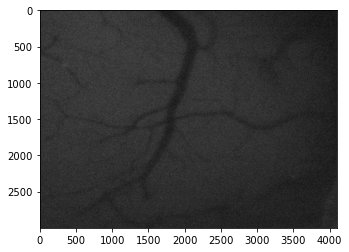

In [14]:
ret, frame = cap.read() 
plt.imshow(frame)

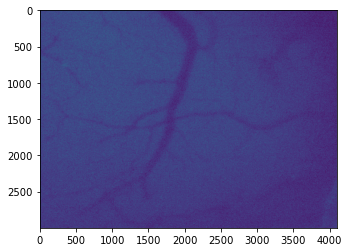

In [15]:
plt.imshow(frame[:,:,1])

In [16]:
frame.shape

(3000, 4096, 3)

In [17]:
cap.release()

In [ ]:
movie = np.zeros((frame.shape[0],frame.shape[1],df_camera_triggers.shape[0]))
for i in tqdm(range(df_camera_triggers.shape[0])):

    # read un-stabilized frame
    frame = stream_org.read()
    movie[:,:,i]=frame[:,:,1]
stream_org.stop()

  0%|          | 0/3933 [00:00<?, ?it/s]

In [32]:
movie = np.zeros((frame.shape[0],frame.shape[1],df_camera_triggers.shape[0]))
for i in tqdm(range(df_camera_triggers.shape[0])):
    cap.set(1,i)
    movie[:,:,i]=frame[:,:,1]
    

  0%|          | 0/3933 [00:00<?, ?it/s]

KeyboardInterrupt: 

# working from .npy

In [1]:
import numpy as np
import os,sys,glob
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
imaging_path = '/Volumes/DATA6/targeting/data/jgcamp7/jgcamp7_2022_8_31-9_40_46'

In [3]:
df_camera_triggers = pd.read_csv(os.path.join(imaging_path,'TUcam_triggers.csv'),index_col=None,header=None)
df_grating_frames  = pd.read_csv(os.path.join(imaging_path,'grating_frames.csv'),index_col=None,header=None)
df_gratings        = pd.read_csv(os.path.join(imaging_path,'gratings.csv'),index_col=None)

### check the stimulus data

In [4]:
df_gratings

,,Frame,Timestamp,Value
0,0.016745,(8/31/2022 9:40:46 AM -06:00,1,1.57)
1182,19.839143,(8/31/2022 9:41:06 AM -06:00,1,-3.14)
2376,39.864156,(8/31/2022 9:41:26 AM -06:00,1,3.14)
3571,59.888926,(8/31/2022 9:41:46 AM -06:00,1,-1.57)
4763,79.898420,(8/31/2022 9:42:06 AM -06:00,1,-1.57)
...,...,...,...,...
113058,1902.189927,(8/31/2022 10:12:29 AM -06:00,1,-1.57)
114189,1922.233042,(8/31/2022 10:12:49 AM -06:00,1,3.14)
115385,1942.242504,(8/31/2022 10:13:09 AM -06:00,1,-3.14)
116585,1962.270038,(8/31/2022 10:13:29 AM -06:00,1,1.57)


In [5]:
df_camera_triggers

,0,1,2,3,4
0,(9,40,46,679,637975356466795392)
1,(9,40,46,790,637975356467905920)
2,(9,40,46,913,637975356469137664)
3,(9,40,47,39,637975356470397312)
4,(9,40,47,164,637975356471644160)
...,...,...,...,...,...
7873,(10,13,58,972,637975376389727488)
7874,(10,13,59,100,637975376391004160)
7875,(10,13,59,226,637975376392266752)
7876,(10,13,59,353,637975376393533056)


### check the raw imaging data

In [6]:
movie = np.load(os.path.join(imaging_path,'movie.npy'))

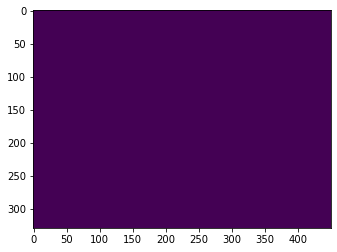

In [7]:
plt.imshow(movie[:,:,-1])

In [8]:
good_frames = np.ones(movie.shape[-1]).astype(bool)
for i in tqdm(range(good_frames.shape[0])):
    if np.mean(movie[:,:,i]) > 0.5: good_frames[i]=True
    else:good_frames[i]=False

  0%|          | 0/50000 [00:00<?, ?it/s]

In [9]:
good_movie = movie[:,:,good_frames]

In [10]:
good_movie.shape

(329, 450, 25455)

In [11]:
f0 = good_movie[:,:,0]

In [12]:
dff = np.zeros(good_movie.shape)
for i in tqdm(range(dff.shape[-1])):
    dff[:,:,i]=(good_movie[:,:,i]-f0)/f0

  0%|          | 0/25455 [00:00<?, ?it/s]

find trials

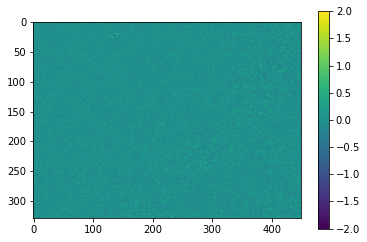

In [25]:
plt.imshow(dff[:,:,100],clim=(-2,2))
plt.colorbar()

In [14]:
trial_starts = [0]+np.where(np.diff(np.where(dff[200,200,:]<-0.5)[0])>20)[0].tolist()

compute mean across trials

In [15]:
max_frames_per_trial = np.max(np.diff(trial_starts))

In [16]:
avg_dff = np.zeros((dff.shape[0],dff.shape[1],max_frames_per_trial))

In [17]:
for trial_start in tqdm(trial_starts):
    avg_dff += dff[:,:,trial_start:trial_start+max_frames_per_trial]
avg_dff/=len(trial_starts)    

  0%|          | 0/64 [00:00<?, ?it/s]

In [18]:
from scipy.ndimage.filters import gaussian_filter

(array([0.0000000e+00, 0.0000000e+00, 1.9900000e+02, 9.3690000e+03,
        4.7108190e+06, 2.2133602e+07, 2.8643500e+06, 1.5419900e+05,
        1.1960000e+04, 1.6203200e+05]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 10 artists>)

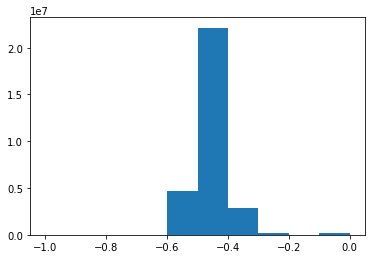

In [19]:
plt.hist(avg_dff.flatten(),range=(-1,0))

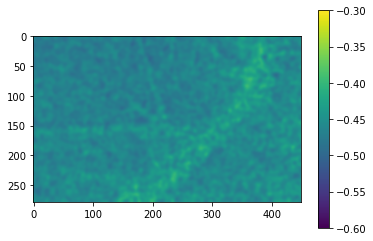

In [26]:
plt.imshow(gaussian_filter(avg_dff[50:,:,10], 3),clim=(-0.6,-0.3))
plt.colorbar()

In [27]:
import matplotlib as mpl 
mpl.rcParams['animation.ffmpeg_path'] = r'/Users/danieljdenman/Desktop/ffmpeg'

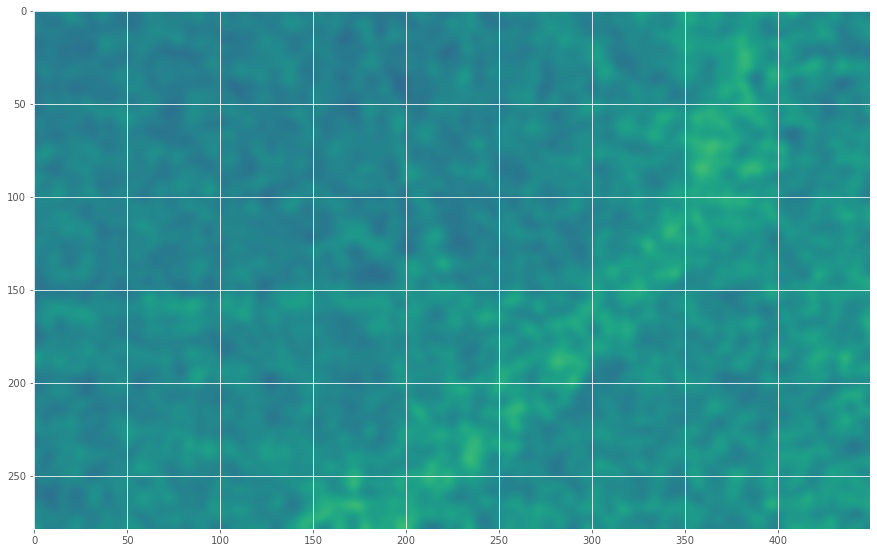

In [28]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter

fig = plt.figure(figsize=(15,15))



def animate(i):
    plt.style.use("ggplot")    
    plt.imshow(gaussian_filter(avg_dff[50:,:,i], 3),clim=(-.6,-0.3))

ani = FuncAnimation(fig, animate, interval=300)

f = os.path.join(imaging_path,'avg.mp4') 
writergif = FFMpegWriter(fps=20) 
ani.save(f, writer=writergif)